## a)

In [1]:
from matplotlib import pyplot as plt

def show_image(img, title):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

In [2]:
# read saffrun.jpg image using cv2.imread() function
# remove the noise from the image using FFT
import numpy as np

def remove_noise_fft(img, threshold=20000):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    show_image(np.log(np.abs(fshift)), 'Fourier Shift')
    rows, cols = img.shape
    # create a mask first that remove pixels with frequency less than threshold
    for i in range(rows):
        for j in range(cols):
            if np.abs(fshift[i][j]) < threshold:
                fshift[i][j] = 1
    show_image(np.log(np.abs(fshift)), 'Fourier Shift after removing noise')
    # apply inverse fourier transform
    f_ishift = np.fft.ifftshift(fshift)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back 


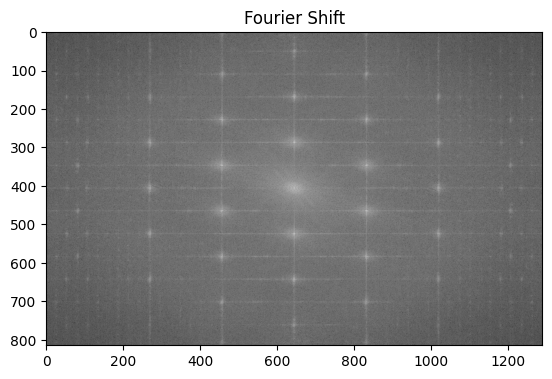

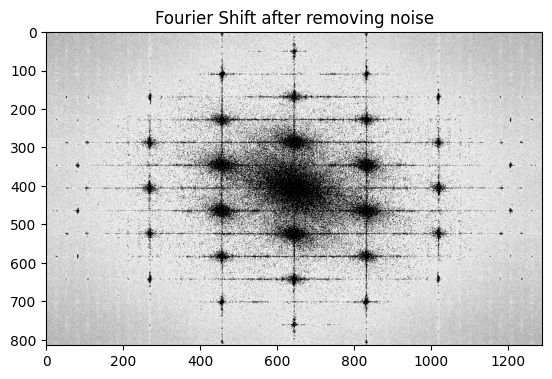

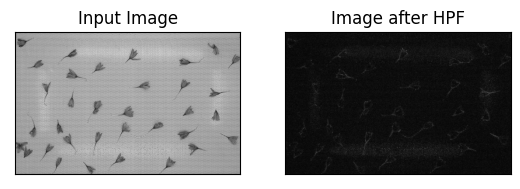

In [4]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/saffrun.jpg', 0)
img_back = remove_noise_fft(img)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.show()
    